<a href="https://colab.research.google.com/github/shubhamk16/Deep_learning/blob/master/S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/Assignment_7/

/content/gdrive/My Drive/Assignment_7


In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ls

cudas.py        individual_class_acc.py  packages.py   test_accuracy.py
data/           model.py                 __pycache__/  test.py
data_loader.py  orig_pred_images.py      summary.py    train.py


In [5]:
import data_loader

trainloader = data_loader.trainloader
testloader =  data_loader.testloader
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [6]:
import model
from summary import model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

net = model.ResNet18().to(device)
model_summary(net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14           [-1, 64,

In [0]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torch.nn as nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [8]:
import torch
from tqdm import tqdm
import train
import test
test_acc = []
train_acc = []
for epoch in range(30):  # loop over the dataset multiple times
    if epoch>10:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    train_acc.append(train.train(net, device, trainloader, optimizer, criterion, epoch))
    test_acc.append(test.test(net, device, testloader))
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.1


Epoch= 0 Loss=1.7256381511688232 Batch_id=390 Accuracy=43.75: 100%|██████████| 391/391 [01:11<00:00,  6.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 40 %
lr=  0.1


Epoch= 1 Loss=1.4908699989318848 Batch_id=390 Accuracy=50.00: 100%|██████████| 391/391 [01:13<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 52 %
lr=  0.1


Epoch= 2 Loss=0.9845907092094421 Batch_id=390 Accuracy=67.50: 100%|██████████| 391/391 [01:14<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 62 %
lr=  0.1


Epoch= 3 Loss=0.9418169856071472 Batch_id=390 Accuracy=73.75: 100%|██████████| 391/391 [01:14<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 68 %
lr=  0.1


Epoch= 4 Loss=0.5505493879318237 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [01:14<00:00,  5.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 73 %
lr=  0.1


Epoch= 5 Loss=0.624208927154541 Batch_id=390 Accuracy=85.00: 100%|██████████| 391/391 [01:14<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 75 %
lr=  0.1


Epoch= 6 Loss=0.6525126099586487 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [01:13<00:00,  5.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 76 %
lr=  0.1


Epoch= 7 Loss=0.6666386723518372 Batch_id=390 Accuracy=81.25: 100%|██████████| 391/391 [01:14<00:00,  5.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 79 %
lr=  0.1


Epoch= 8 Loss=0.4252062439918518 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [01:14<00:00,  5.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80 %
lr=  0.1


Epoch= 9 Loss=0.5126327276229858 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [01:14<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 80 %
lr=  0.1


Epoch= 10 Loss=0.4152504801750183 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [01:14<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82 %
lr=  0.1


Epoch= 11 Loss=0.3282296657562256 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [01:14<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 82 %
lr=  0.1


Epoch= 12 Loss=0.31583836674690247 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [01:14<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 13 Loss=0.40732789039611816 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [01:14<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 14 Loss=0.15874220430850983 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:14<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.1


Epoch= 15 Loss=0.2257262021303177 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [01:14<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 16 Loss=0.12265115976333618 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:14<00:00,  5.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 17 Loss=0.24931983649730682 Batch_id=390 Accuracy=93.75: 100%|██████████| 391/391 [01:14<00:00,  5.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83 %
lr=  0.1


Epoch= 18 Loss=0.25748032331466675 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [01:14<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84 %
lr=  0.1


Epoch= 19 Loss=0.13291782140731812 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:13<00:00,  6.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85 %
lr=  0.05


Epoch= 20 Loss=0.1188335195183754 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:13<00:00,  6.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87 %
lr=  0.05


Epoch= 21 Loss=0.0444708876311779 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:13<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87 %
lr=  0.05


Epoch= 22 Loss=0.009432882070541382 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87 %
lr=  0.05


Epoch= 23 Loss=0.04748592525720596 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87 %
lr=  0.05


Epoch= 24 Loss=0.006794142536818981 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  6.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 25 Loss=0.0036327361594885588 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:13<00:00,  6.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 26 Loss=0.010032827034592628 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:13<00:00,  6.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 27 Loss=0.020376693457365036 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:12<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 28 Loss=0.035763923078775406 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:13<00:00,  6.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86 %
lr=  0.05


Epoch= 29 Loss=0.02115141786634922 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:12<00:00,  6.02it/s]
100%|██████████| 79/79 [00:03<00:00, 24.43it/s]

Accuracy of the network on the 10000 test images: 86 %
Finished Training


Text(0, 0.5, 'Accuracy')

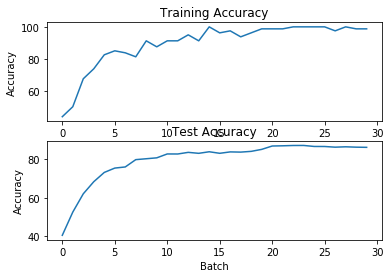

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
axs[0].plot(train_acc)
axs[0].set_title("Training Accuracy")
axs[0].set_xlabel("Batch")
axs[0].set_ylabel("Accuracy")
axs[1].plot(test_acc)
axs[1].set_title("Test Accuracy")
axs[1].set_xlabel("Batch")
axs[1].set_ylabel("Accuracy")

In [15]:
test.test_categorywise(net, device, testloader, classes)

100%|██████████| 79/79 [00:03<00:00, 25.49it/s]

Accuracy of plane : 84 %
Accuracy of   car : 83 %
Accuracy of  bird : 86 %
Accuracy of   cat : 68 %
Accuracy of  deer : 76 %
Accuracy of   dog : 69 %
Accuracy of  frog : 92 %
Accuracy of horse : 86 %
Accuracy of  ship : 93 %
Accuracy of truck : 93 %
